# TSIA202 - Practical work

Delhio CALVES, Rémi DUCOTTET

## Exercise 1 : Computing averages and covariances

#### Question 1

We observe that the empirical mean of the samples of the white noise Z converges towards 0, which is what we expected.
 
We also note that the auto-covariance function $\gamma$ tends to zero
for the non-null-indices samples, the null-index sample is non-null. It is also conform to the theory.

#### Question 2

We observe that the empirical means tend to 0 when the number of iterations grows. That observation corresponds to the fact that the signal is obtained by linearly filtering the white noise Z. Hence, the output signal is centered, as we observed.
 
Moreover, we have : $\gamma(n) = \displaystyle\phi^n\sum_{i=0}^{+\infty}\phi^{2i}\sigma^2$ but $\phi = 0.6$, so $\gamma(n) = \sigma^2 \phi^n \displaystyle\frac{1}{1-\phi^2}$,  so we expect that the auto-covariance function would tend to 0 when i tends to infinity, and that is what is observed. The samples whose index is close enough to 0 is non-null, conformly to theory.

#### Question 3

We also observe the same phenomenon with the mean samples as in the previous case. This is due to the fact that X is the sum of a centered white noise with a cosine that is centered, $\phi_0$ being a uniform random variable  in [0,2pi] (we compute the integral of the cos between zero and 2$\pi$).

$\mathbb {E}\left[X_{t}\right]=A_0 \mathbb{E}\big[ cos(\lambda_0 t + \phi_0 )\big] + \mathbb{E}\big[Z_t\big] = 0$

($Z_t$ is centered and as $\phi_0$ is uniform, $cos(\lambda_0 t + \phi_0 )$ is uniform on an odd interval, so the esperance is null)
We now compute the covariance function, that is equal to the esperance of the product

$\mathbb {E}\left[X_{t}X_{t+h}\right]=\mathbb {E}\big[\big(A_0 cos(\lambda_0 t +\phi_0) + Z_t \big)\big(A_0 cos(\lambda_0(t+h)+\phi_0 ) +Z_{t+h}\big)\big]
\newline
~~~~~~~~~~~~~~~~~~~= 
\mathbb {E}\left[\frac{A_0^2}{2} \big\{cos(\lambda_0(2t+h)+2\phi_0)+cos(\lambda_0 h)\big\}+Z_tA_0cos(\lambda_0(t+h)+\phi_0) + Z_{t+h}A_0 cos(\lambda_0 t + \phi_0)+Z_t Z_{t+h}\right]
$

But,  $\mathbb {E}\big[Z_tA_0cos(\lambda_0(t+h)+\phi_0)\big]=\mathbb {E}\left[Z_t
\right]\mathbb {E}\left[A_0cos(\lambda_0(t+h)+\phi_0)\right]=0$ because the processes are IID and $Z_t$ is centered. We do the same reasonnement for the similar term.

As $Z_t$ is a White noise we have :

$\mathbb {E}\left[X_{t}X_{t+h}\right]=\frac{A_0^2}{2}\left\{\mathbb {E}\big[cos(\lambda_0h)\big]+\mathbb {E}\big[cos(\lambda_0(2t+h)+2\phi_0)\big]\right\}+\delta (h)\sigma^2$

However, $cos(\lambda_0(2t+h)+2\phi_0)$ follows a uniform law and we have:

$\mathbb {E}\left[X_{t}X_{t+h}\right]=\frac{A_0^2}{2}cos(\lambda_0h)+\delta (h)\sigma^2$

On the practical work, we have $A_0=1$, $\sigma = 1$ and $\lambda_0=\frac{\pi}{3}$

Hence $\mathbb {E}\left[X_{t}X_{t+h}\right]=\frac{\cos\left(\frac{\pi h}{3}\right)}{2} + \delta(h)$

It doesn't depend on $t$ anymore and we see on the courb obtained that the covariance has is periodic of period 6.

## Exercise 2 : Spectral density estimation and periodogram

#### Question 1

We have that $I_n(\lambda) = \displaystyle\frac{2\pi}{n} \displaystyle\left\lvert \frac{1}{2\pi} \sum_{t=0}^{n-1}(X_t - \hat{\mu}_n)e^{-i\lambda t}\right\rvert^²$

#### Question 2

Such an algorithm can be deduced by computing $I_n(2\pi\frac{k}{m})$ for $k \in \{0,1,~..., m-1\}$, where $m \geq n$ thanks to the relation found in the previous question. Indeed, we compute $I_n$ thanks to the following code, with the help of the DFT of order n of the input signal:

$\texttt{I = 2*np.pi/n*np.abs(np.fft.fft(X-np.mean(X),n))**2}$

#### Question 3

We can obtain $\hat{\gamma}_n(h)$ from $I_n(2\pi\frac{k}{m})$ thanks to the inverse DFT of order $2n - 1$. The function $\texttt{acovb(X)}$ correctly computes the autocovariance function of $X$ from the set of samples, because the plot corresponds to those observed in question 1.

#### Question 4

Let us plot the variance of the periodogram with different values of $n$.

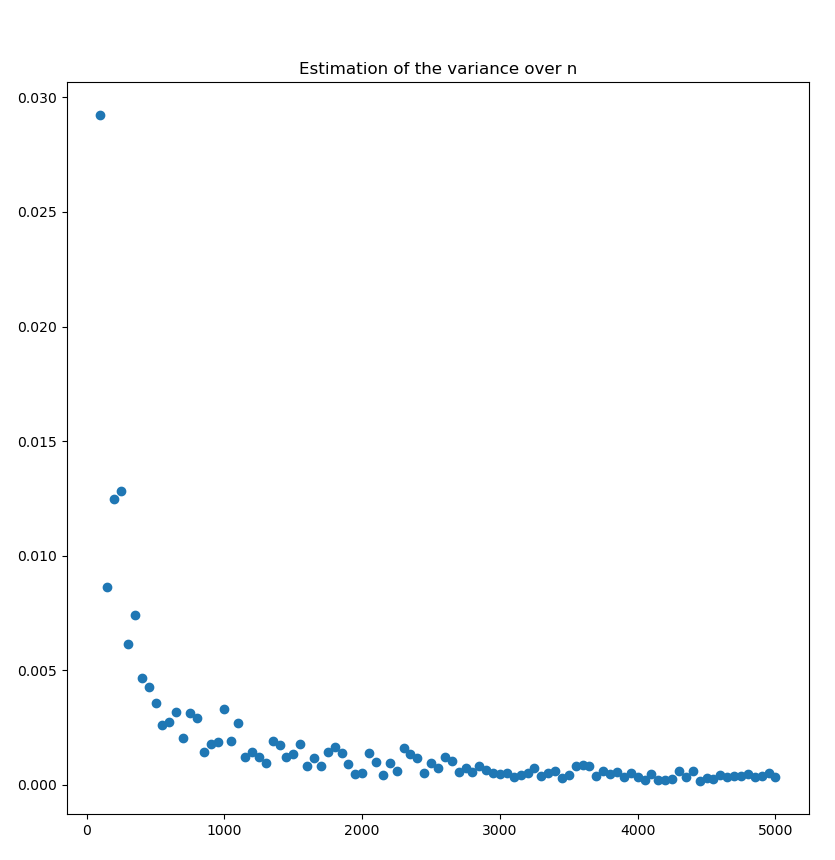

We observe that when $n$ grows, the variance decreases. Hence, in order to make a good estimation, we should take values of $n$ that are large enough.

## Exercise 3 : Filtering random processes

### Part I - Yule-Walker equations

#### Question 1

As the equation is a causal representation of the AR$(p)$ = ARMA$(p,0)$ process $X$, we know that the filter $\psi$ such that $X = F_{\psi}(Z)$ is causal.
$\newline$
Hence, $X_t = F_{\psi}(Z_t) = (Z \ast \psi)(t) = \displaystyle \sum_{k=0}^{+\infty}{\psi_k Z_{t-k}}$
$\newline$
Thus, $\forall h \geq 1, X_{t-h} = \displaystyle \sum_{k=0}^{+\infty}{\psi_k Z_{t-h-k}}$, which leads us to
$\newline$
$\mathbb{E}(X_{t-h}Z_t) = \mathbb{E}(\displaystyle\sum_{k=0}^{+\infty}{\psi_k Z_{t-h-k}Z_t}) = \displaystyle\sum_{k=0}^{+\infty}{\psi_k} \mathbb{E}(Z_{t-h-k}Z_t) = 0$ because $Z$ is a weak white noise.

#### Question 2

Let $h \geq 1$.
By writing the AR($\infty$) form of $X_t$ we prove that $X_t$ is a linear combination of $(Z_t)_{\forall t \in \mathbb{Z}}$. Hence $\mathbb{E}[X_t]=0,~\forall t \in \mathbb{Z}$

$\displaystyle\gamma(h)=\mathbb{E}[X_tX_{t+h}]
\newline \displaystyle ~~~~~~~=\mathbb{E}\left[X_t \left(\sum_{i=1}^{p}\phi_i X_{t+h-i} + Z_{t+h}\right)\right]
\newline$ $  \displaystyle ~~~~~~~=\mathbb{E}\left[\sum_{i=1}^{p}\phi_i X_{t+h-i}X_t\right] + 0 $ (because the previous question gave us that $\mathbb{E}[X_tZ_{t+h}]=0$)
$\newline \displaystyle ~~~~~~~=\sum_{i=1}^{p}\phi_i \gamma (h-i)$

#### Question 3

$\displaystyle\gamma(0)=\mathbb{E} \left[\left(\sum_{i=1}^{p}\phi_i X_{t-i} + Z_t\right)X_t\right]
\newline \displaystyle ~~~~~~~=\mathbb{E}\left[\sum_{i=1}^{p} \phi_i X_{t-i}X_{t}\right] + \mathbb{E} \left[Z_t \left( \sum _{i=1}^{p}\phi_i X_{t-i} + Z_t\right)\right]
\newline \displaystyle ~~~~~~~=\sum_{i= 1}^p \gamma(-i)\phi_i+ \sum_{i=1}^p \phi_i \mathbb{E}[Z_tX_{t-i}]  + \mathbb{E}[Z_t^2]$

Hence : $\displaystyle \gamma(0)=\sum_{i=1}^{p} \gamma(-i)\phi_i  + \sigma^2$

#### Question 4

$
  \Gamma_{p+1} =
  \left[ {\begin{array}{cccc}
    \gamma (0) & \gamma(-1) & \cdots & \gamma(-p)\\
    \gamma (1) & \gamma (0) & \cdots & \gamma (-(p-1))\\
    \vdots & \vdots & \ddots & \vdots\\
    \gamma (p) & \gamma (p-1) & \cdots & \gamma (0)\\
  \end{array} } \right]
$

### Part II - Estimation

#### Question 1

Let us implement this fragment of code in $\textit{speech.py}$ :
$\newline$
$\texttt{n = 1000}$
$\newline$
$\texttt{p = 4}$
$\newline$
$\texttt{std = 1}$
$\newline$
$\texttt{X, phi = rp.genAR(p, n, std)}$

#### Question 2

First we compute Gamma, thanks to the $\textit{acovb}$ method.
Then we use the $\textit{toeplitz}$ method from the linalg documentary to compute the estimator with $\texttt{linalg.toeplitz(gamma[:p+1], gamma[:p+1])}$ (because one of the property of the covariance function is that $\gamma(h) = \overline{\gamma(-h)}$, and here $\gamma$ is real).

#### Question 3

We compute $\nu$ thanks to the inverse function of the linalg library applied to $\hat{\Gamma}^{-1}_{n,p+1}$. Then, we have: $\frac{1}{\hat{\sigma^2}}=\hat{\Gamma}^{-1}_{n,p+1}
\begin{pmatrix}
1 \\
0 \\
\vdots \\
0 \\
\end{pmatrix}
\begin{pmatrix}
1 & 0 & \cdots & 0 \\
\end{pmatrix} = \nu \begin{pmatrix}
1 & 0 & \cdots & 0 \\
\end{pmatrix}$, and it suffices to take the inverse of this quantity to obtain the estimated variance.
$\newline$
Then, let $\tilde{\nu} =
\begin{pmatrix}
\hat{\sigma^2} \\
0 \\
\vdots \\
0 \\
\end{pmatrix}$. Let us compute the matricial product $\hat{\Gamma}^{-1}_{n,p+1}\tilde{\nu}$ and we obtain a vector which contains the opposite of the AR coefficients. Hence, we observe a relative error below $5~\%$. We also note that the frequencies associated to the poles of $\displaystyle\frac{1}{\Phi(z^{-1})}$ correspond to the frequencies where the PSD has amplitude peaks, see the plots below.

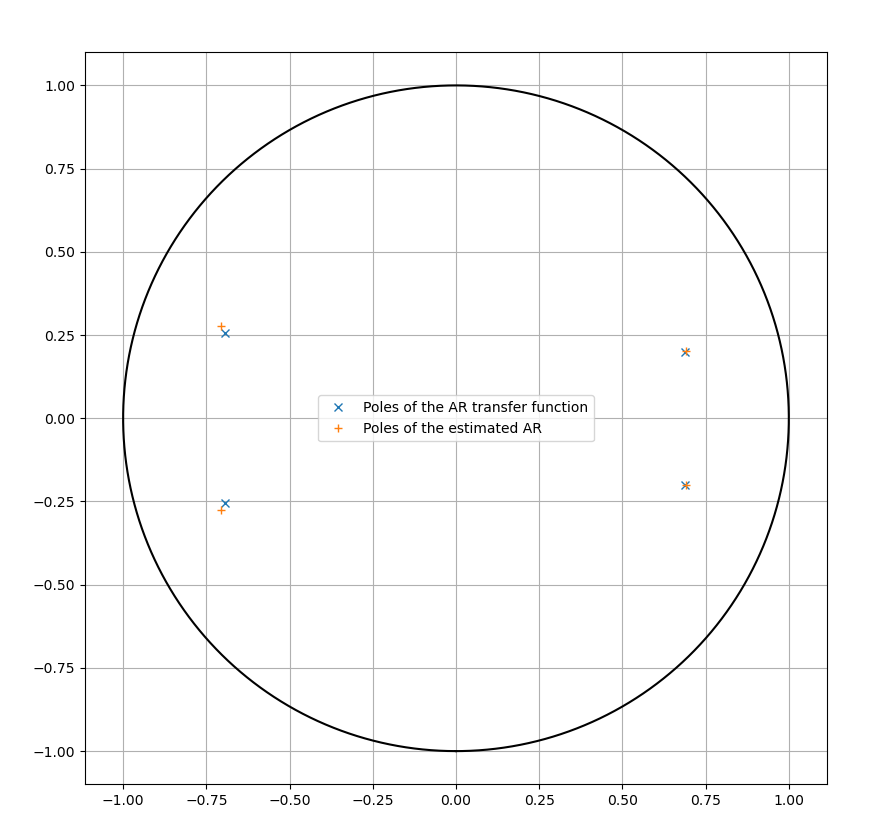

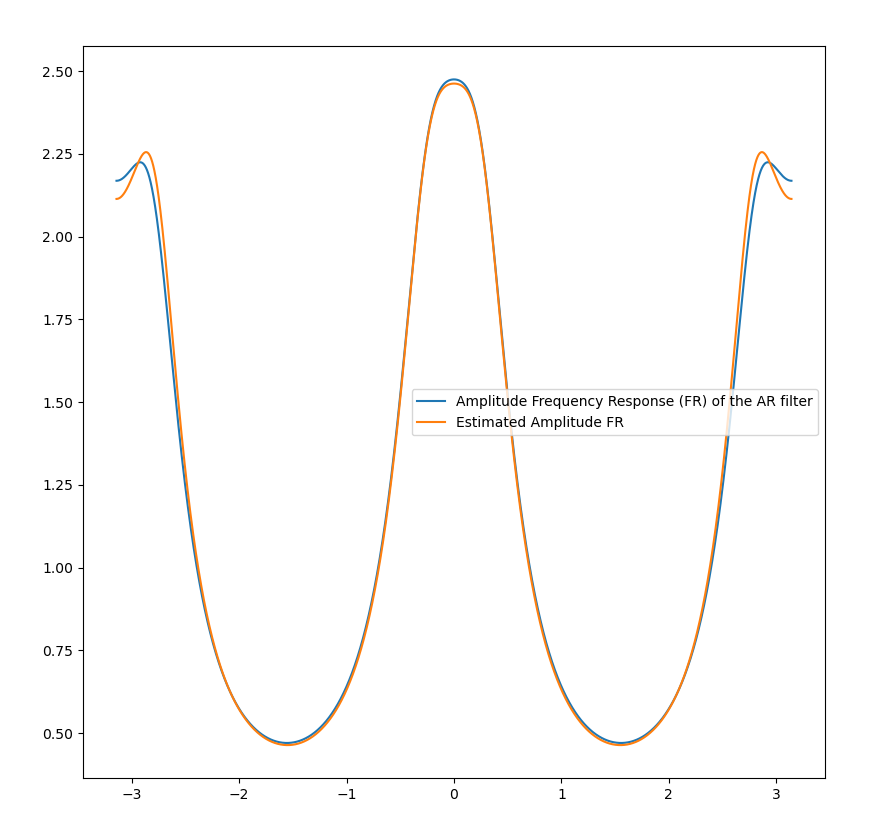

### Part III - Application to speech signal

#### Question 1

We must take $minT = \frac{F_s}{F_{max}}$ and $maxT = \frac{F_s}{F_{min}}$, with $F_{min} = 80$ Hz, $F_{max} = 400$ Hz.